# Base model

In [4]:
import sys
import os
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from src.models.baseModels.resnet_regression import ResNetModel

resnet = ResNetModel(data_dir='../datasets/artificial_data/noisy_generated_images', num_epochs=1)
resnet.load_data()
resnet.train()
resnet.evaluate()

Epoch 1/1, Loss: 1.0955885450045268
Accuracy of the network on the test images: 45.0%


Original Image Shape: (256, 256, 3)


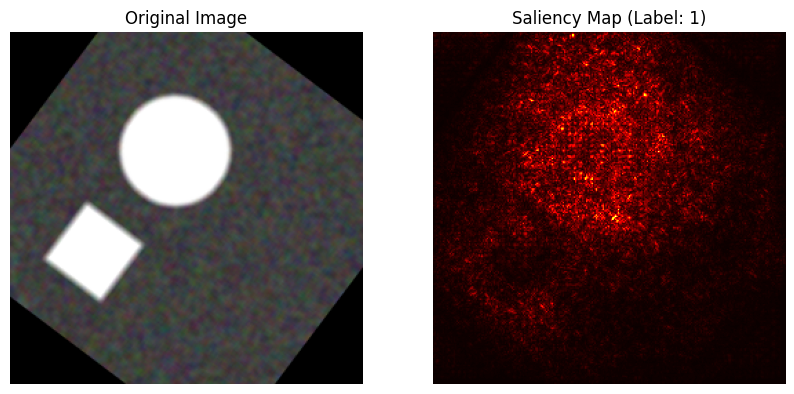

In [6]:
from src.XAI.XAI import XAIResNet
import importlib

# Assuming XAIResNet was already imported previously
importlib.reload(sys.modules['src.XAI.XAI'])

# Initialize XAI instance
xai_resnet = XAIResNet(modelWrapper=resnet, device=resnet.device)
# Fetch an image and its label from the test data
input_image, input_label = resnet.get_single_test_image(index=3) 
# Check if data was retrieved
if input_image is not None:
    # Generate and view the saliency map for the selected image and label
    xai_resnet.generate_saliency_map(input_image, input_label)